In [1]:
import os
import re
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

xr.set_options(display_expand_data=False)

%config InlineBackend.figure_format='retina'

In [2]:
#TSIDs:
TSIDs = ['BESI', 'GREGOR', 'HOP', 'JIL', 'NICHTJIL', 'SOM', 
         'TEST-HOP', 'TEST-HOP-mgn', 'TEST-SOM-mgn', 'TEST-VST',
         'TS021', 'TS025', 'TS027', 'TS028', 'TS029', 'VST']

BSs = ['forearm', 'back-lower', 'back-lower-nsa', 'abdomen', 'thigh']

HVs = ['h', 'v']


#Data File Path:
file_path = os.path.join(glob.glob('C:\\Users\\mvomstein\\projects\\vt-2pod')[0], 'DATA')

file_path_save = glob.glob(
    'C:\\Users\\mvomstein\\projects\\vt_2pod_data_analysis\\DATA_xr')[0]

In [3]:
ds = xr.open_mfdataset(os.path.join(file_path_save, 'postmean', '*.nc'))
ds

<xarray.Dataset>
Dimensions:    (stimRange: 24, tsid: 16, bs: 5, hv: 2)
Coordinates:
  * stimRange  (stimRange) float64 2.5 5.0 7.5 10.0 12.5 ... 52.5 55.0 57.5 60.0
  * bs         (bs) object 'forearm' 'back-lower' ... 'abdomen' 'thigh'
  * hv         (hv) object 'h' 'v'
  * tsid       (tsid) object 'BESI' 'GREGOR' 'HOP' ... 'TS028' 'TS029' 'VST'
Data variables:
    postmean   (stimRange, tsid, bs, hv) float64 dask.array<chunksize=(24, 1, 5, 2), meta=np.ndarray>

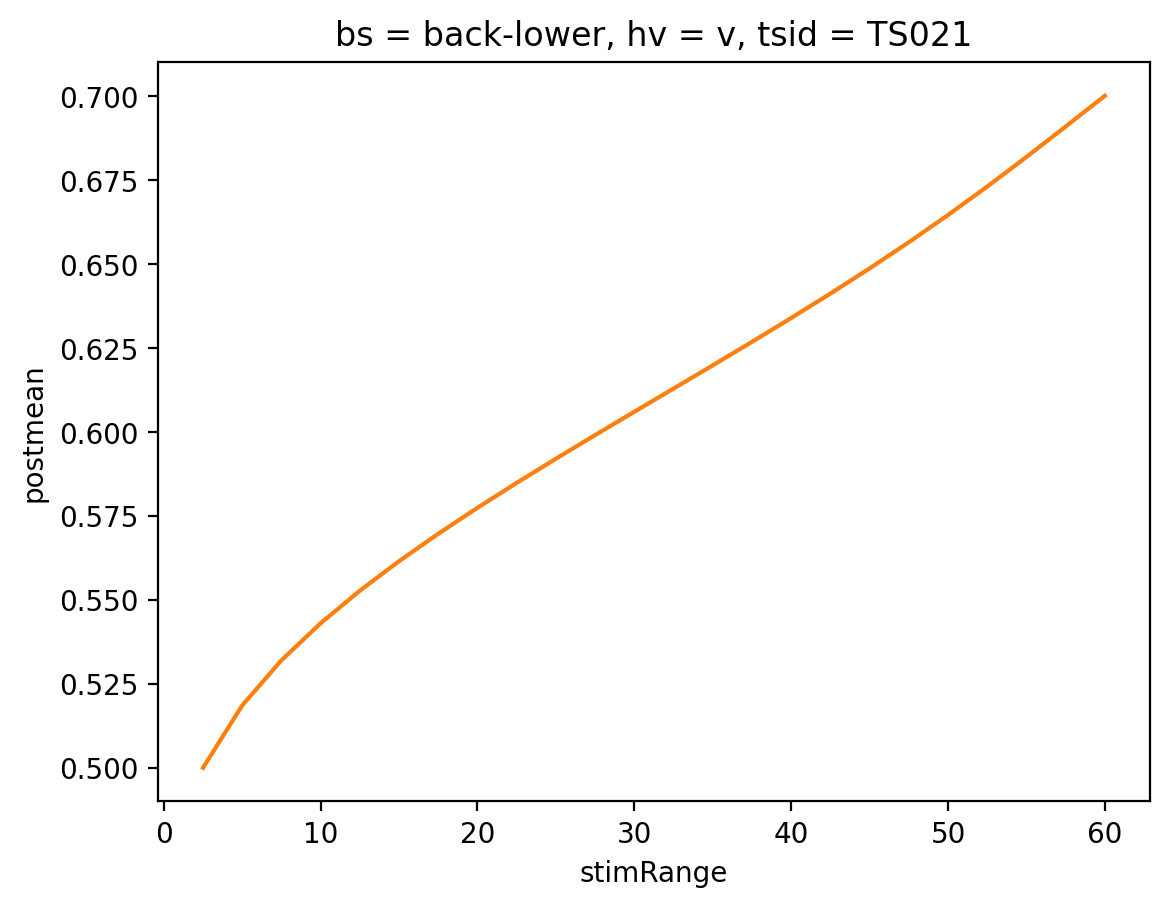

In [4]:
ds.postmean.sel(tsid='TS021',bs='back-lower', hv='h').plot()
ds.postmean.sel(tsid='TS021',bs='back-lower', hv='v').plot()

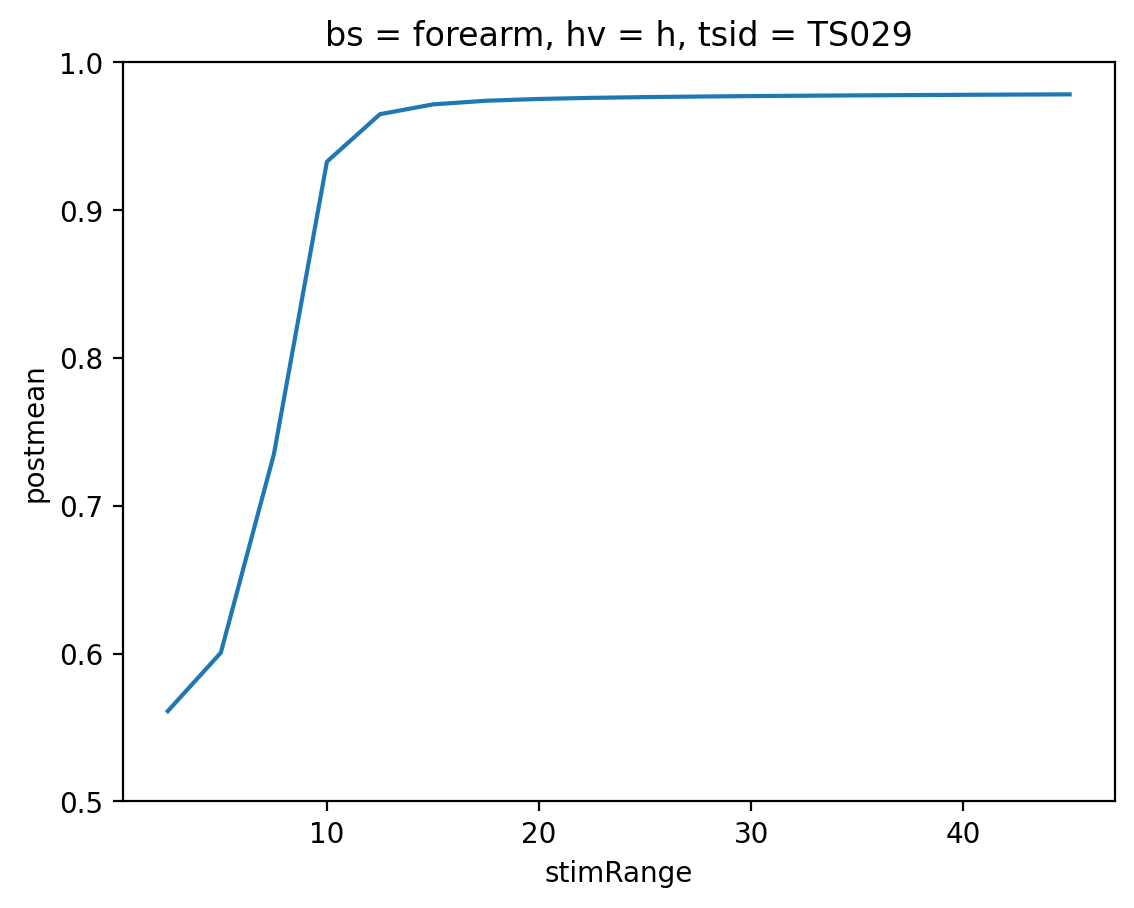

In [5]:
ds.postmean.sel(tsid='TS029', bs='forearm', hv='h').plot.line(x='stimRange', ylim=[0.5,1]);

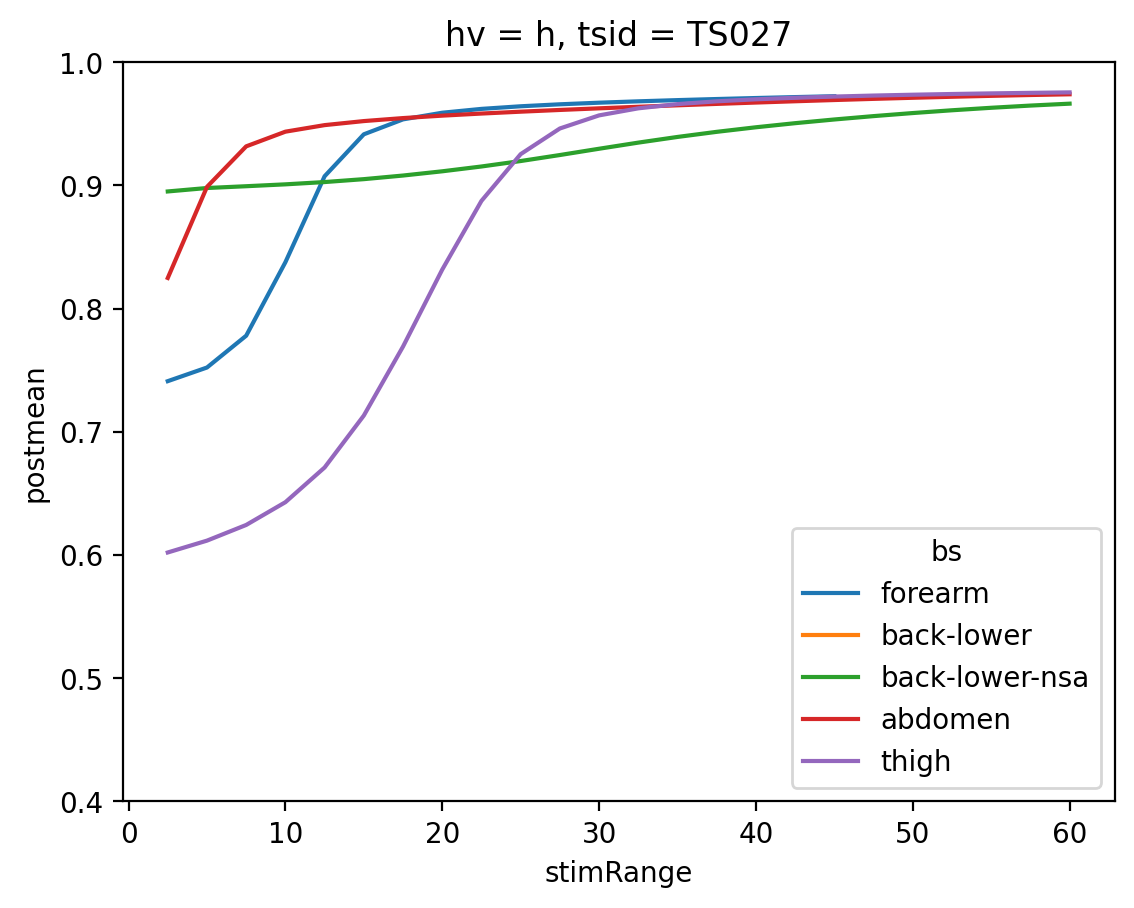

In [6]:
ds.postmean.sel(tsid='TS027', bs=BSs, hv='h').plot.line(x='stimRange',ylim=[0.4,1]);

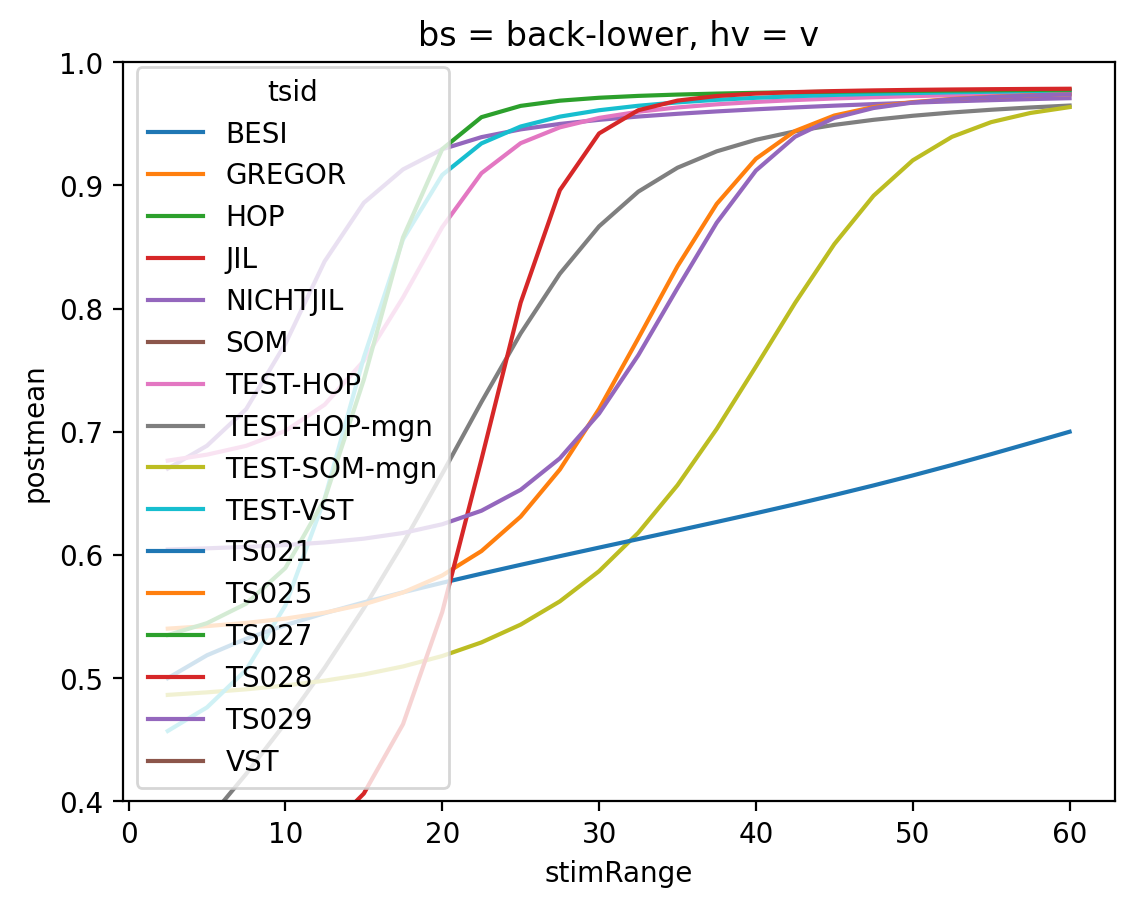

In [7]:
ds.postmean.sel(tsid=TSIDs, bs='back-lower', hv='v').plot.line(x='stimRange', ylim=[0.4,1]);

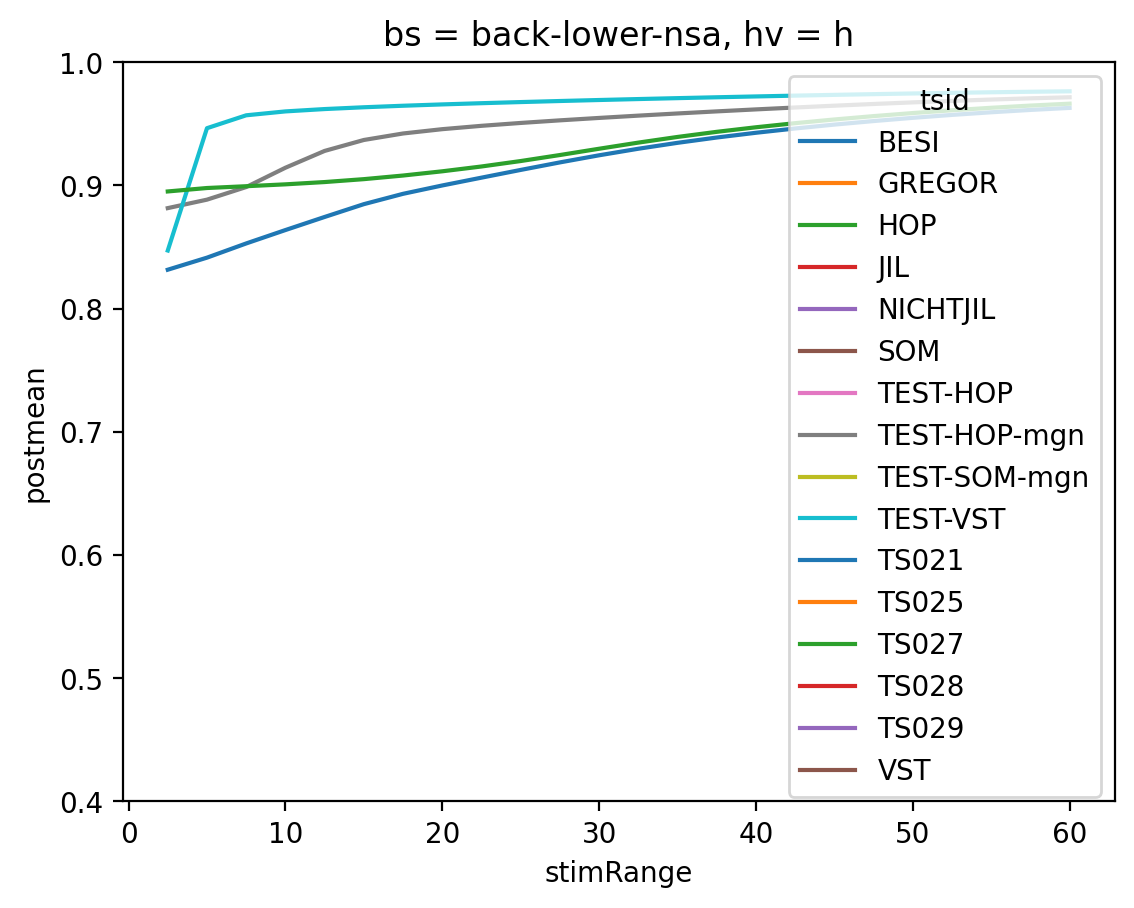

In [8]:
ds.postmean.sel(tsid=TSIDs, bs='back-lower-nsa', hv='h').plot.line(x='stimRange',ylim=[0.4,1]);

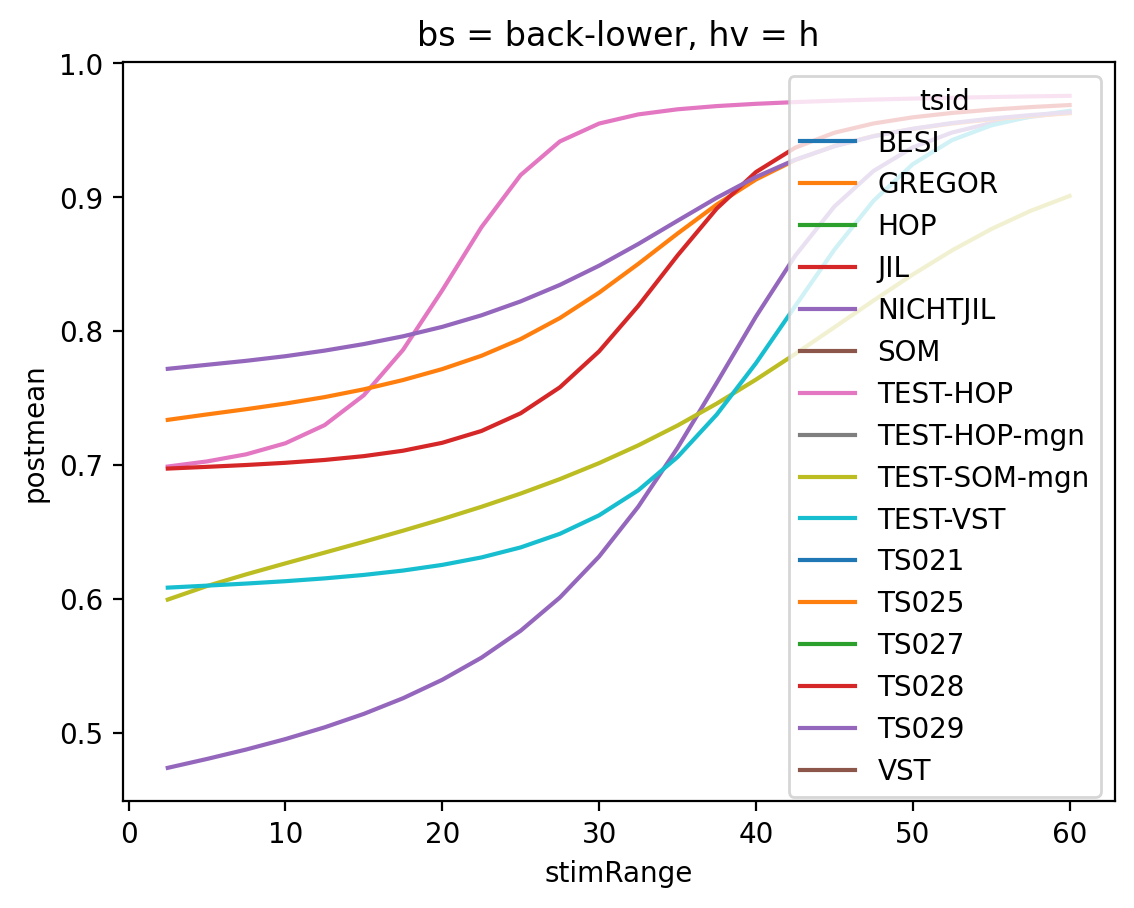

In [9]:
 ds.postmean.sel(tsid=TSIDs,bs='back-lower', hv='h').plot.line(x='stimRange');

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


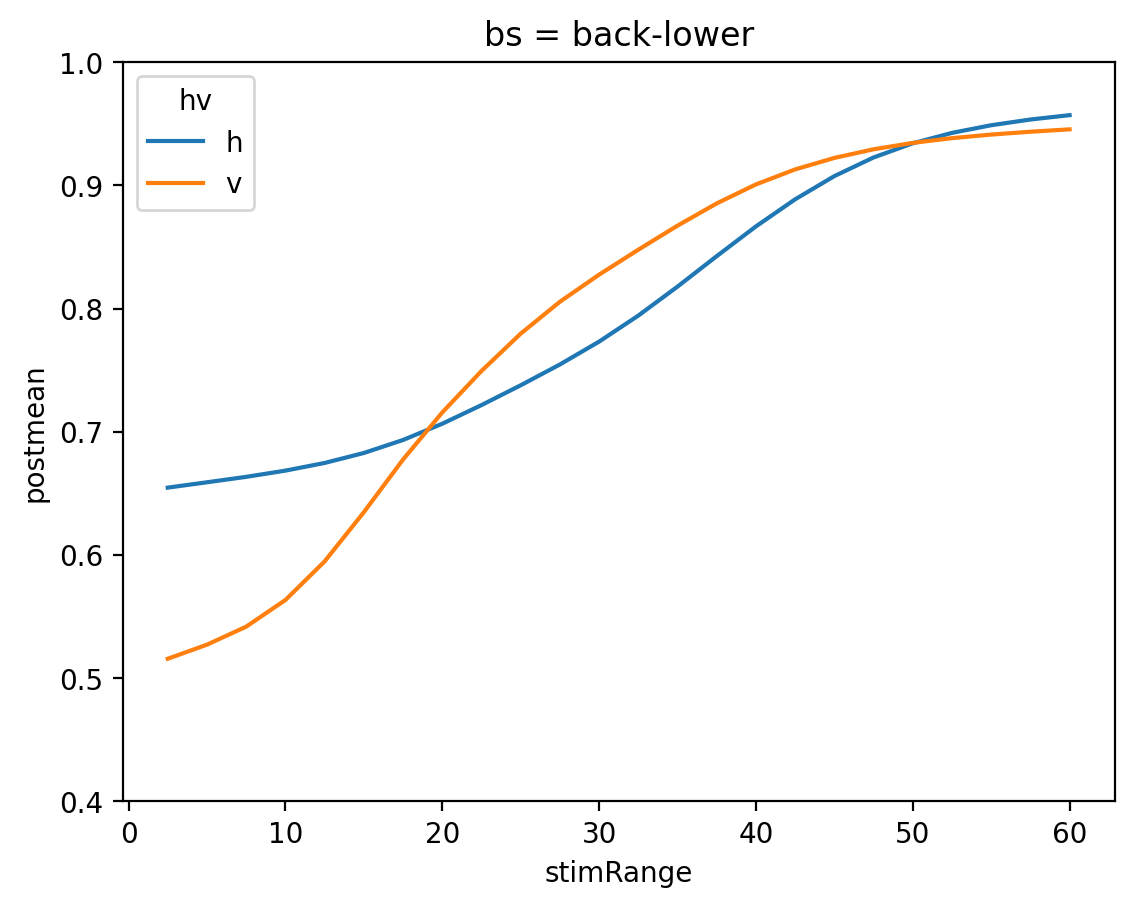

In [10]:
ds.postmean.mean(dim='tsid').sel(bs='back-lower', hv=['h','v']).plot.line(x='stimRange',ylim=[0.4,1]);

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


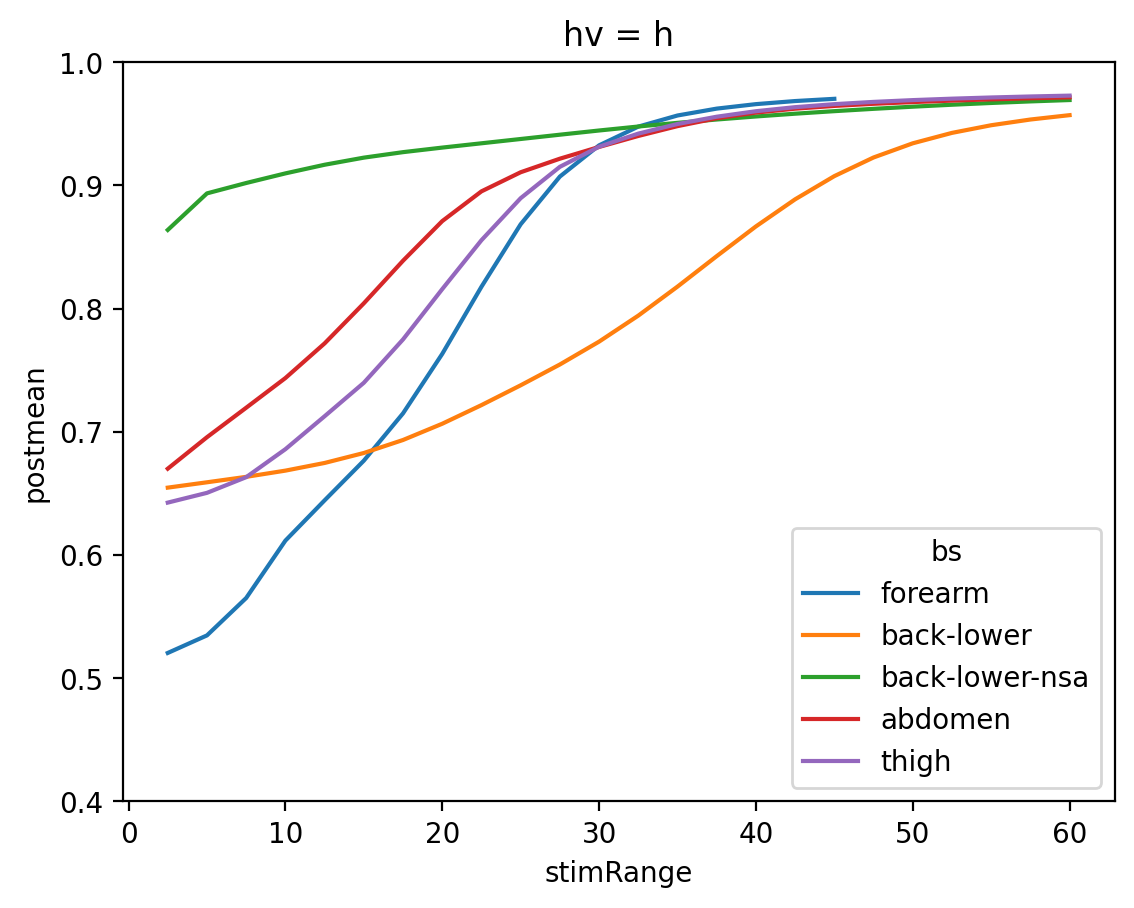

In [11]:
ds.postmean.mean(dim='tsid').sel(bs=BSs, hv='h').plot.line(x='stimRange',ylim=[0.4,1]);

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


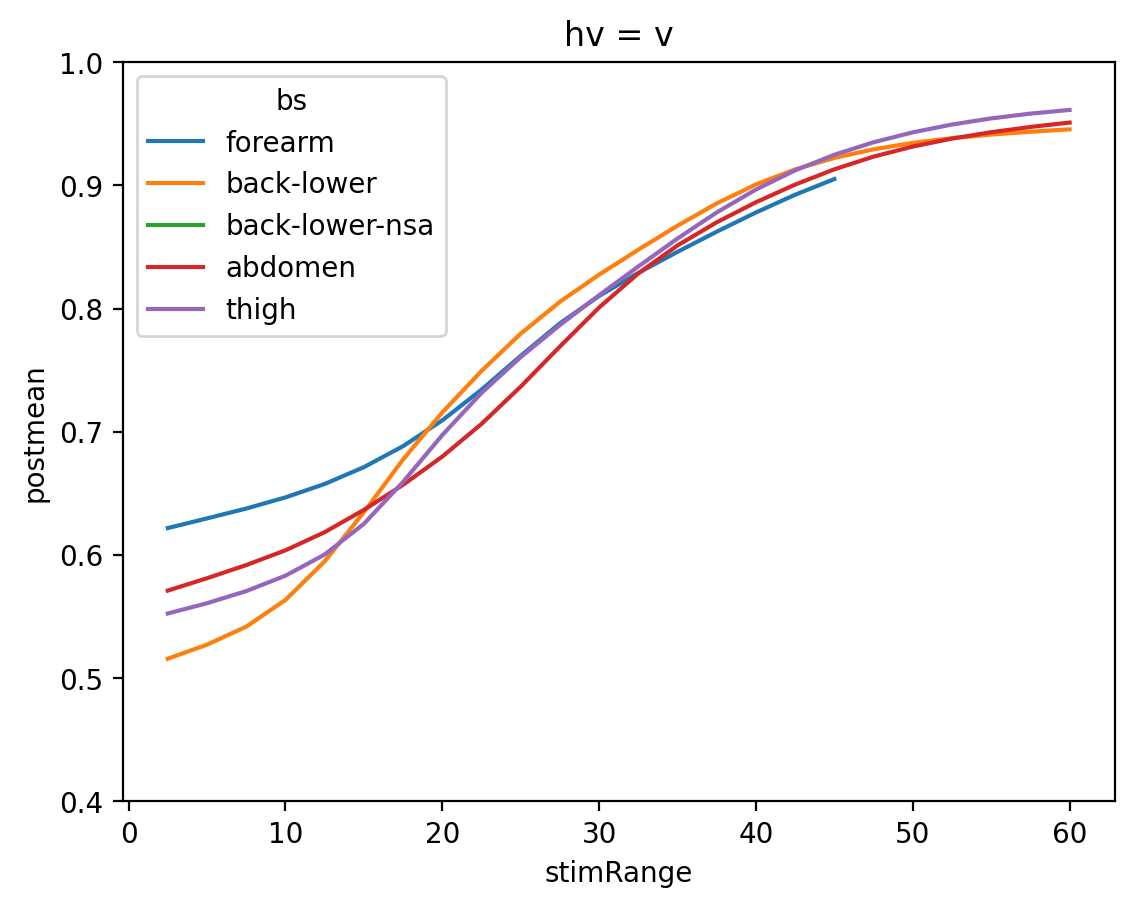

In [12]:
ds.postmean.mean(dim='tsid', skipna=True).sel(bs=BSs, hv='v').plot.line(x='stimRange',ylim=[0.4,1]);

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


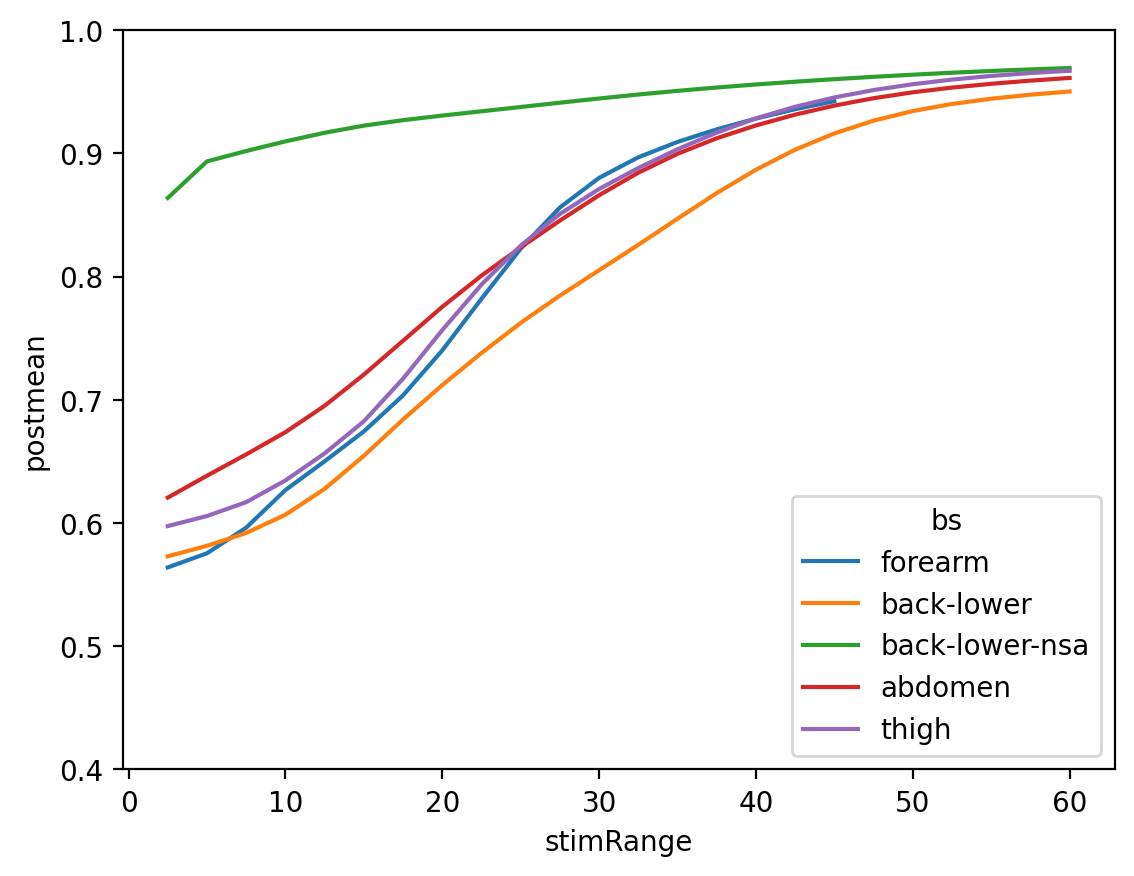

In [13]:
ds.postmean.mean(dim=['tsid','hv']).sel(bs=BSs).plot.line(x='stimRange',ylim=[0.4,1]);

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


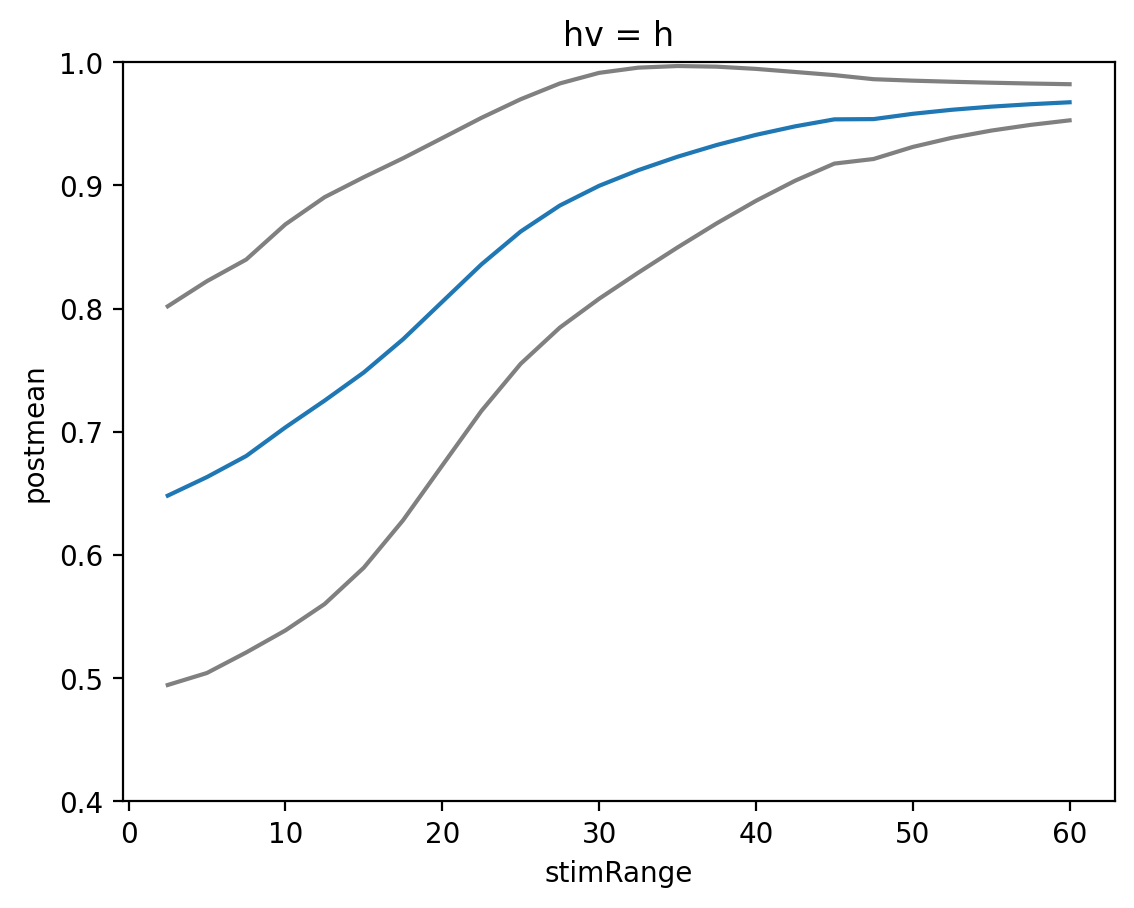

In [14]:
ds.postmean.mean(dim=['tsid','bs']).sel(hv='h').plot.line(x='stimRange',ylim=[0.4,1]);

(ds.postmean.std(dim=['tsid','bs']).sel(hv='h') +
 ds.postmean.mean(dim=['tsid','bs']).sel(hv='h')).plot.line(x='stimRange',ylim=[0.4,1], color='gray');

(ds.postmean.mean(dim=['tsid','bs']).sel(hv='h') -
 ds.postmean.std(dim=['tsid','bs']).sel(hv='h')).plot.line(x='stimRange',ylim=[0.4,1], color='gray');

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


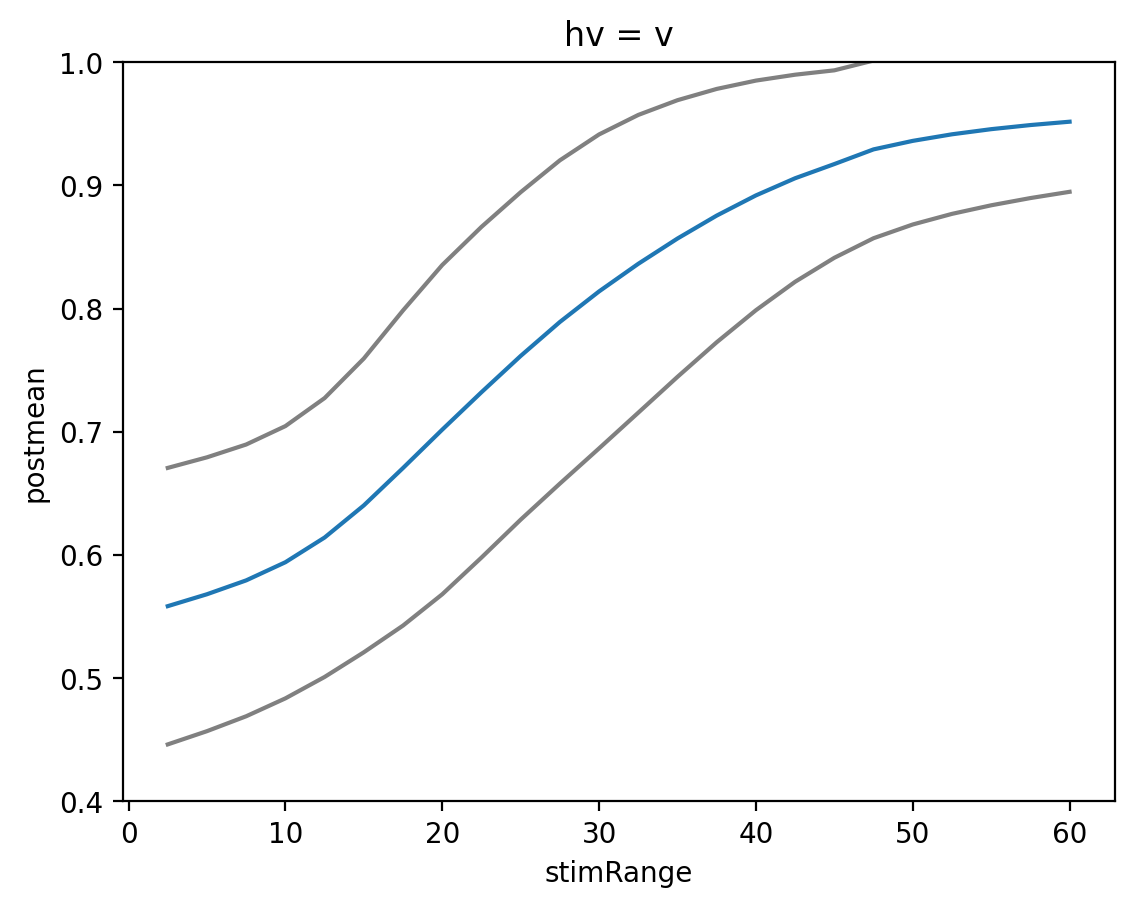

In [15]:
ds.postmean.mean(dim=['tsid','bs']).sel(hv='v').plot.line(x='stimRange',ylim=[0.4,1]);

(ds.postmean.std(dim=['tsid','bs']).sel(hv='v') +
 ds.postmean.mean(dim=['tsid','bs']).sel(hv='v')).plot.line(x='stimRange',ylim=[0.4,1], color='gray');

(ds.postmean.mean(dim=['tsid','bs']).sel(hv='v') -
 ds.postmean.std(dim=['tsid','bs']).sel(hv='v')).plot.line(x='stimRange',ylim=[0.4,1], color='gray');

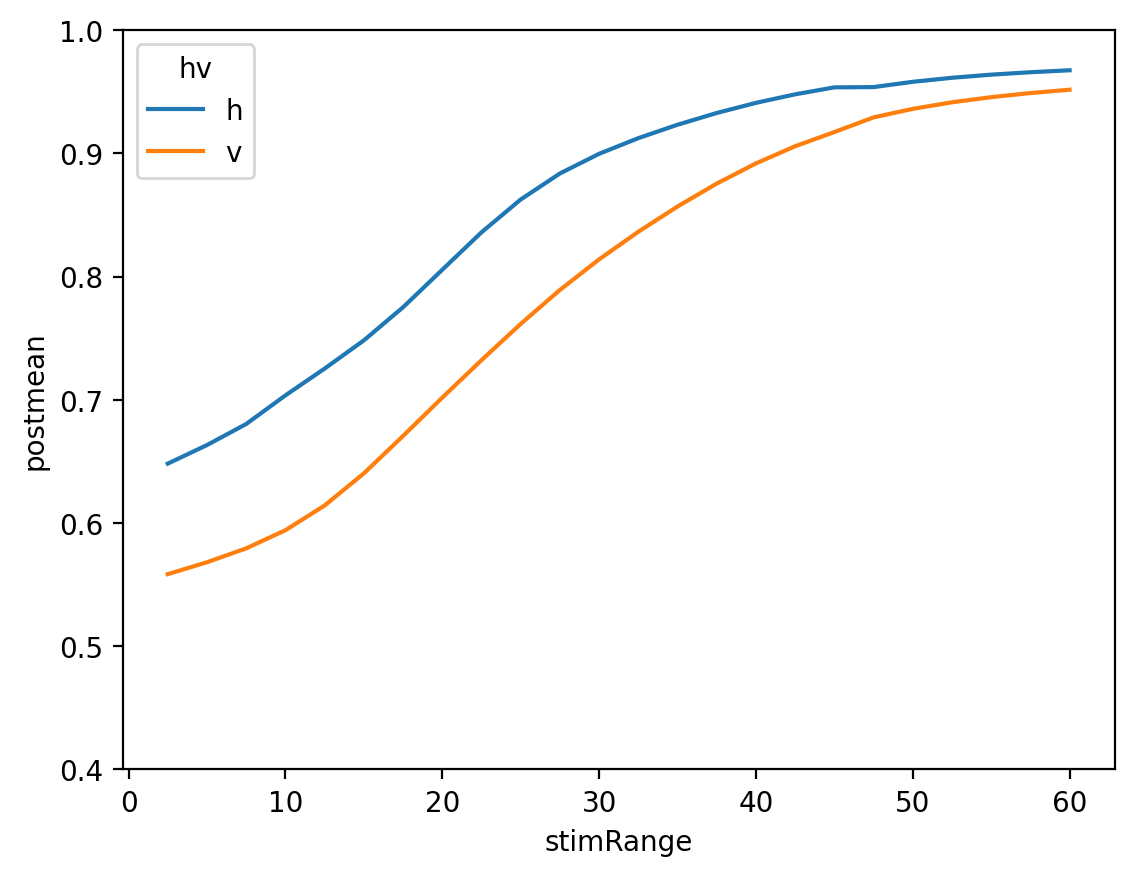

In [16]:
ds.postmean.mean(dim=['tsid','bs']).sel(hv=HVs).plot.line(x='stimRange',ylim=[0.4,1]);

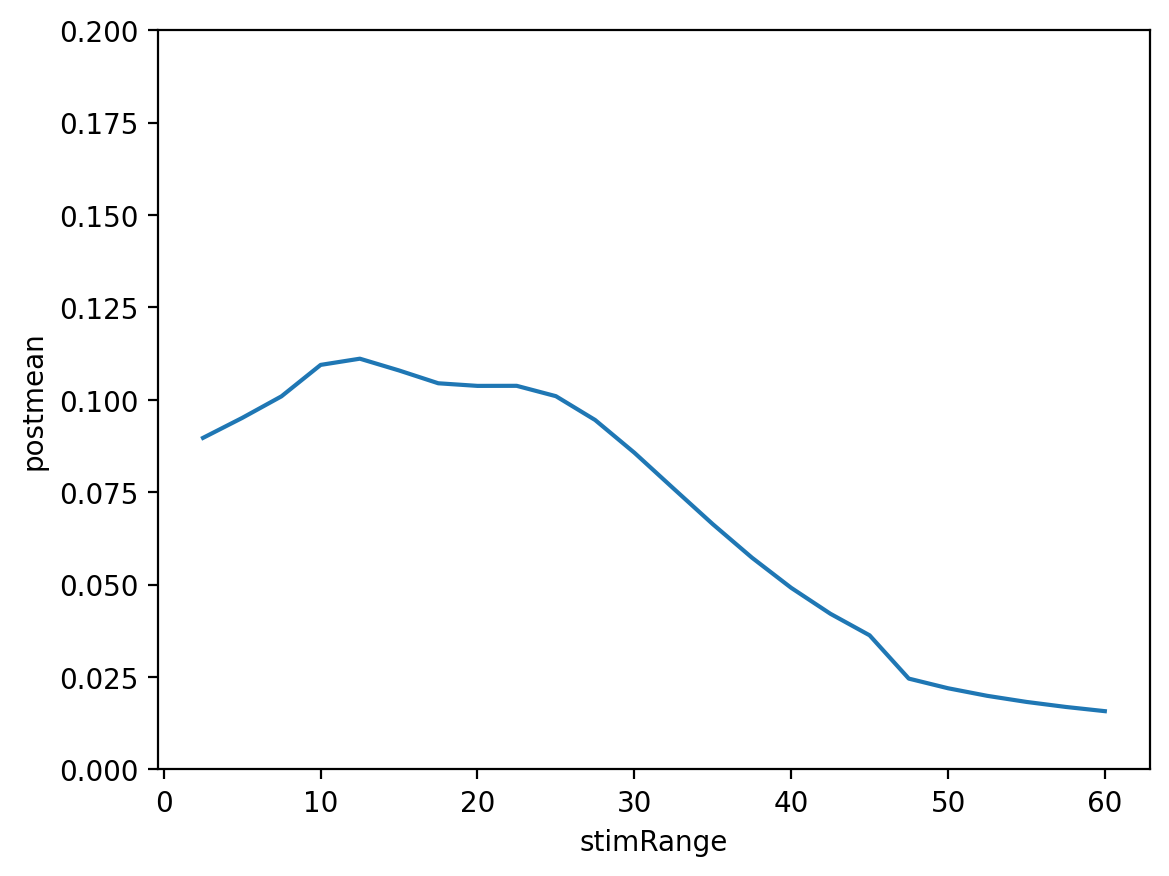

In [17]:
(ds.postmean.mean(dim=['tsid','bs']).sel(hv='h') -
 ds.postmean.mean(dim=['tsid','bs']).sel(hv='v')).plot.line(x='stimRange', ylim=[0, 0.2])

C:\Users\mvomstein\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


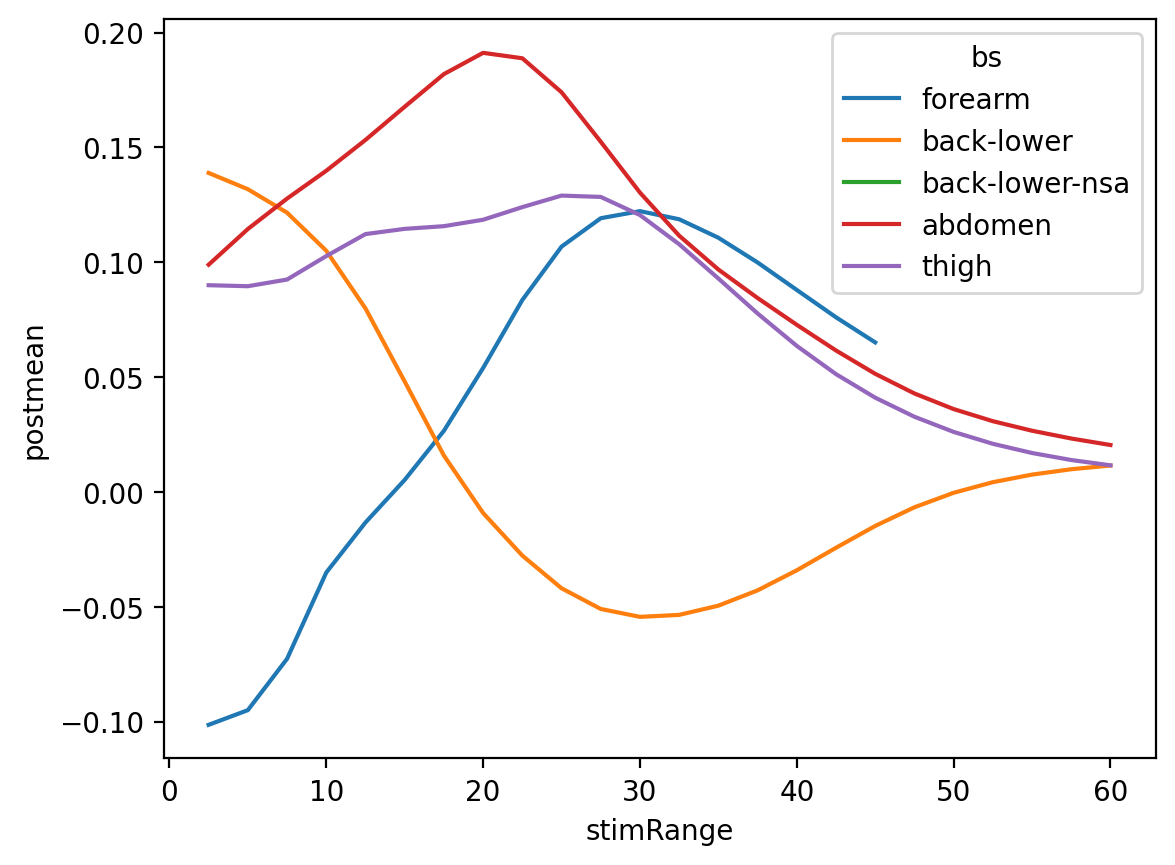

In [18]:
(ds.postmean.mean(dim=['tsid']).sel(bs=BSs, hv='h') -
 ds.postmean.mean(dim=['tsid']).sel(bs=BSs, hv='v')).plot.line(x='stimRange');

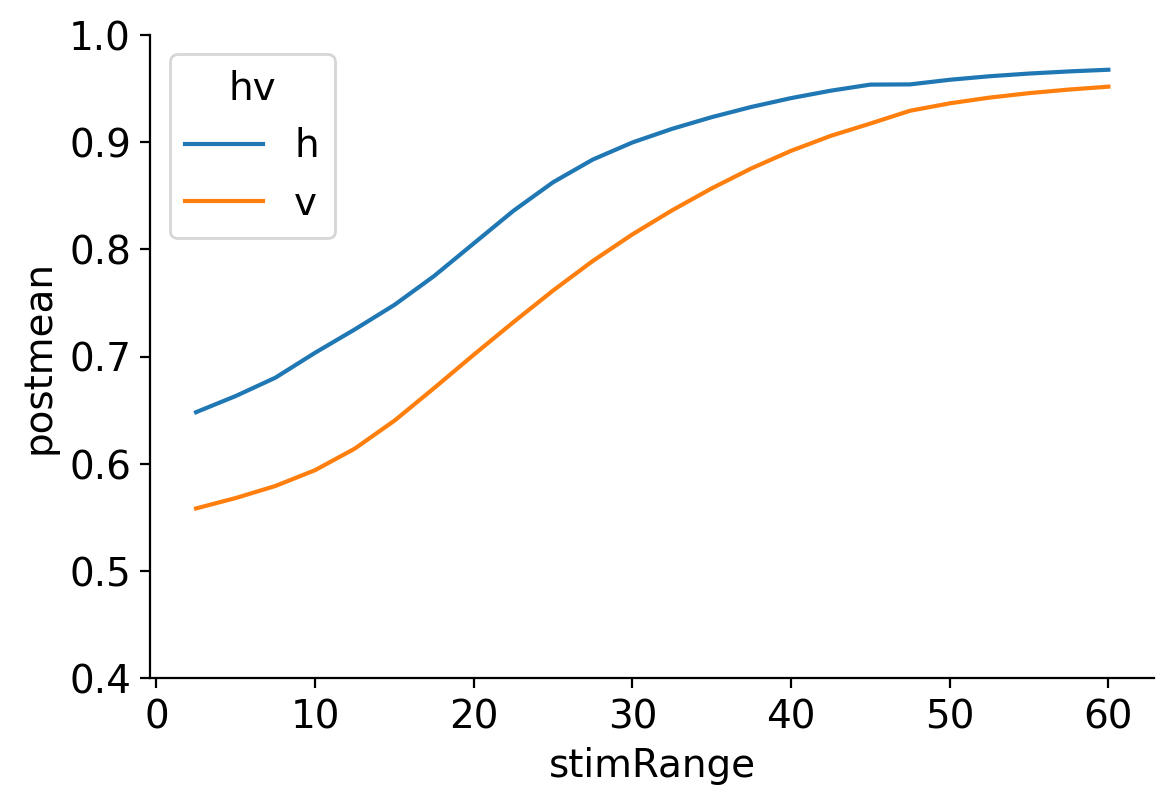

In [19]:
plt.rc('font', size=14)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ds.postmean.mean(dim=['tsid','bs']).sel(hv=HVs).plot.line(x='stimRange',ylim=[0.4,1], ax=ax);

In [26]:
ds

<xarray.Dataset>
Dimensions:    (stimRange: 24, tsid: 16, bs: 5, hv: 2)
Coordinates:
  * stimRange  (stimRange) float64 2.5 5.0 7.5 10.0 12.5 ... 52.5 55.0 57.5 60.0
  * bs         (bs) object 'forearm' 'back-lower' ... 'abdomen' 'thigh'
  * hv         (hv) object 'h' 'v'
  * tsid       (tsid) object 'BESI' 'GREGOR' 'HOP' ... 'TS028' 'TS029' 'VST'
Data variables:
    postmean   (stimRange, tsid, bs, hv) float64 dask.array<chunksize=(24, 1, 5, 2), meta=np.ndarray>

In [33]:
da_ep = xr.open_mfdataset(os.path.join(file_path_save, 'eParams', '*.nc'))
da_ep

,Array,Chunk
Bytes,10.24 kB,640 B
Shape,"(8, 16, 5, 2)","(8, 1, 5, 2)"
Count,48 Tasks,16 Chunks
Type,float64,numpy.ndarray


In [44]:
da_ep.eParams.sel(tsid='TS027', bs='forearm', hv='h', variableEP = 'eGuess').values

array(0.73133199)

In [49]:
ds.postmean.stimRange.values

array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5,
       30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5, 55. ,
       57.5, 60. ])

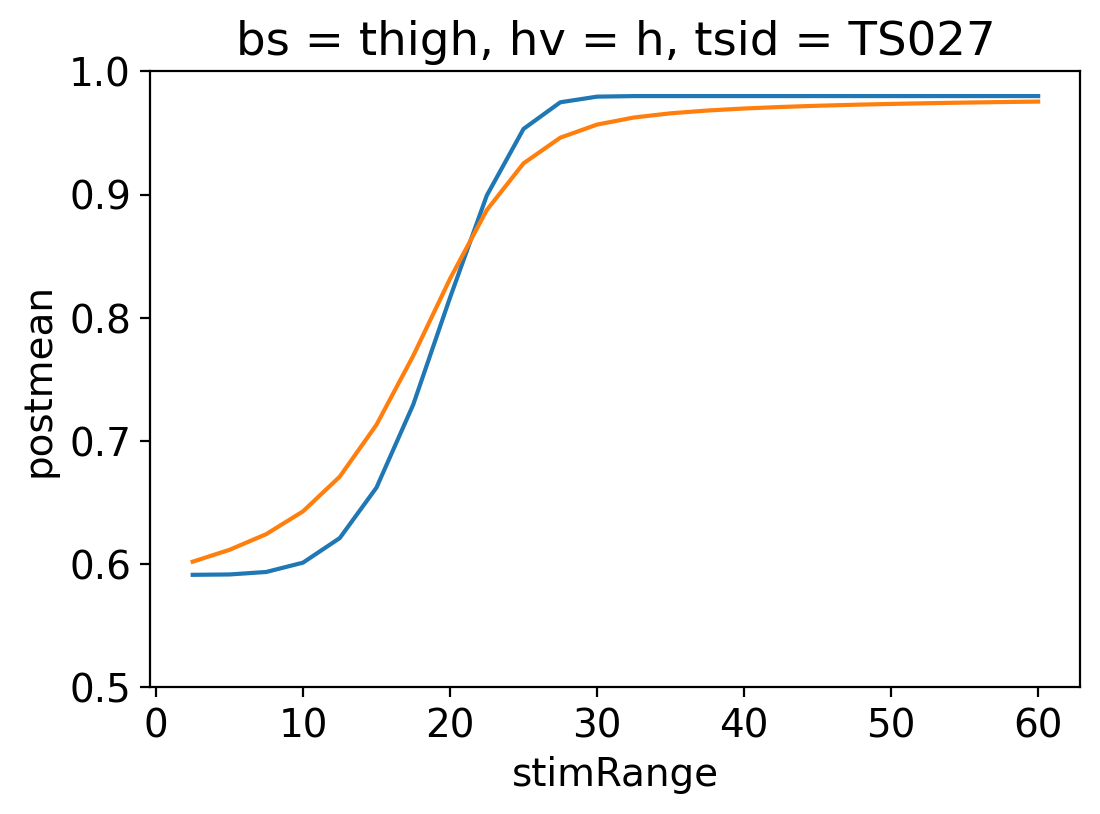

In [65]:
TSID = 'TS027'
BS = 'thigh'
HV = 'h'


eGuess = da_ep.eParams.sel(tsid=TSID, bs=BS, hv=HV, variableEP = 'eGuess').values
eLapse = da_ep.eParams.sel(tsid=TSID, bs=BS, hv=HV, variableEP = 'eLapse').values
eThreshold = da_ep.eParams.sel(tsid=TSID, bs=BS, hv=HV, variableEP = 'eThreshold').values
eSlope = da_ep.eParams.sel(tsid=TSID, bs=BS, hv=HV, variableEP = 'eSlope').values
stimRange = ds.postmean.stimRange.values

ePostmean = eGuess + (1 - eGuess - eLapse) * (1 - 2**((-(stimRange/eThreshold) ** eSlope)))

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(stimRange, ePostmean)

ds.postmean.sel(tsid=TSID, bs=BS, hv=HV).plot.line(x='stimRange', ylim=[0.5,1], ax = ax);

plt.show()

In [ ]:
display(ds.postmean.mean(dim=['tsid', 'bs']).sel(stimRange=[10, 20, 30, 40]))

sns.barplot(x='stimRange', data=ds.postmean.mean(dim=['tsid', 'bs']).sel(stimRange=20).to_pandas())

In [ ]:
ds.postmean.plot.scatter(x='stimRange')

In [ ]:
da_s = xr.open_mfdataset(os.path.join(file_path_save, 'stim', '*.nc')).stim
da_r = xr.open_mfdataset(os.path.join(file_path_save, 'response', '*.nc')).response

In [ ]:
stim_arr = da_s.sel(tsid=TSIDs, bs='forearm', hv='h').dropna(dim='tsid').values
resp_arr = da_r.sel(tsid=TSIDs, bs='forearm', hv='h').dropna(dim='tsid').values
stimResp = np.array([])
stimResp = np.append(stimResp, stim_arr, axis=0)

In [ ]:
stimResp[:,3,0]

In [ ]:
stimResp[:,0]

In [ ]:
stimResp

In [ ]:
np.where(stimResp[0] == 2.5)[][0]